# Data Source and Data Carpentry


This notebook serves as the data source, cleaning and preparation documentation. All data below will be linked by FIPS code.

## List of Data

### <font color=darkblue>USA Data - 2021</font>

Exported from SQL Database:

<font color=darkblue> CDC_PLACES: County Data (GIS Friendly Format), 2023 release (2021 data)
<br> CHRR: County Health Ranking Data (Source Year: 2021) - USA
<br> airquality_county: PM2.5 2021 yearly average  </font>

In [1]:
import pandas as pd
import geopandas as gpd  # Spatial data manipulation

-----------------------------------------------------------------------------------------------------------------------------

## <font color=darkblue>PLACES: County Data (GIS Friendly Format), 2023 release (2021 data)</font>

This dataset contains model-based county-level estimates in GIS-friendly format. PLACES covers the contiguous United States —at county level. Estimates were provided by the Centers for Disease Control and Prevention (CDC), Division of Population Health, Epidemiology and Surveillance Branch. Project was funded by the Robert Wood Johnson Foundation in conjunction with the CDC Foundation. Data sources used to generate these model-based estimates are Behavioral Risk Factor Surveillance System (BRFSS) 2021 or 2020 data, Census Bureau 2021 or 2020 county population estimates, and American Community Survey (ACS) 2017–2021 or 2016–2020 estimates. An ArcGIS Online feature service is also available for users to make maps online or to add data to desktop GIS software.
https://cdcarcgis.maps.arcgis.com/home/item.html?id=2c3deb0c05a748b391ea8c9cf9903588

PLACES 2023 release (2021 data): https://data.cdc.gov/500-Cities-Places/PLACES-County-Data-GIS-Friendly-Format-2023-releas/7cmc-7y5g/about_data

### Reading in CDC PLACES County Health Data 2021 - USA

In [2]:
#CDC 2021 PLACES DATA
CDC_PLACES = pd.read_csv('CDC_PLACES.csv', dtype={'FIPS': str})
pd.set_option("max_columns", None)
pd.set_option("max_rows", None)
CDC_PLACES.head()

,FIPS,STATE_NAME,COUNTY,STATE_ABBR,ACCESS2_AdjPrev,ARTHRITIS_AdjPrev,BINGE_AdjPrev,BPHIGH_AdjPrev,BPMED_AdjPrev,CANCER_AdjPrev,CASTHMA_AdjPrev,CERVICAL_AdjPrev,CHD_AdjPrev,CHECKUP_AdjPrev,CHOLSCREEN_AdjPrev,COLON_SCREEN_AdjPrev,COPD_AdjPrev,COREM_AdjPrev,COREW_AdjPrev,CSMOKING_AdjPrev,DENTAL_AdjPrev,DEPRESSION_AdjPrev,DIABETES_AdjPrev,GHLTH_AdjPrev,HIGHCHOL_AdjPrev,KIDNEY_AdjPrev,LPA_AdjPrev,MAMMOUSE_AdjPrev,MHLTH_AdjPrev,OBESITY_AdjPrev,PHLTH_AdjPrev,SLEEP_AdjPrev,STROKE_AdjPrev,TEETHLOST_AdjPrev,HEARING_AdjPrev,VISION_AdjPrev,COGNITION_AdjPrev,MOBILITY_AdjPrev,SELFCARE_AdjPrev,INDEPLIVE_AdjPrev,DISABILITY_AdjPrev
0,01001,Alabama,Autauga,AL,10.4,28.2,15.5,37.2,65.3,6.3,10.2,84.3,5.7,76.0,85.1,71.5,6.8,44.0,41.3,16.9,62.9,22.7,10.7,17.3,32.1,2.9,29.1,74.8,18.0,38.9,11.7,37.5,3.0,12.7,6.0,4.7,14.3,14.7,3.7,8.2,30.2
1,01003,Alabama,Baldwin,AL,9.5,26.4,17.8,32.7,62.8,6.3,9.9,85.3,5.5,72.6,85.2,71.5,6.5,55.8,40.8,15.0,65.5,23.2,9.8,15.2,31.9,2.7,27.6,75.4,17.3,37.2,11.0,35.1,2.7,9.9,6.0,4.0,13.3,13.2,3.1,7.2,29.1
2,01005,Alabama,Barbour,AL,17.2,30.6,13.4,44.3,68.4,5.9,11.4,81.8,7.5,76.6,82.2,69.0,9.7,36.9,33.2,25.0,47.6,22.6,15.6,27.3,33.5,3.7,40.2,72.5,20.5,43.4,15.8,43.9,4.4,22.3,7.2,8.6,19.9,21.8,6.7,12.9,40.7
3,01007,Alabama,Bibb,AL,14.3,29.5,15.4,39.6,65.8,6.2,10.4,82.3,6.7,72.7,82.8,70.3,8.6,40.7,36.1,22.0,53.5,23.3,12.4,22.0,34.0,3.1,36.0,71.1,19.4,39.6,14.0,40.0,3.6,17.0,7.0,6.2,17.3,17.7,4.8,10.2,35.6
4,01009,Alabama,Blount,AL,13.1,28.4,16.0,35.2,62.4,6.4,10.1,82.9,6.2,72.7,83.4,70.1,7.8,40.8,37.4,19.6,58.4,24.2,10.5,18.6,34.1,2.9,30.4,69.6,18.8,37.7,12.8,37.3,3.0,14.6,6.8,4.9,15.9,15.6,3.9,8.8,32.4


In [3]:
CDC_PLACES.dtypes

FIPS                     object
STATE_NAME               object
COUNTY                   object
STATE_ABBR               object
ACCESS2_AdjPrev         float64
ARTHRITIS_AdjPrev       float64
BINGE_AdjPrev           float64
BPHIGH_AdjPrev          float64
BPMED_AdjPrev           float64
CANCER_AdjPrev          float64
CASTHMA_AdjPrev         float64
CERVICAL_AdjPrev        float64
CHD_AdjPrev             float64
CHECKUP_AdjPrev         float64
CHOLSCREEN_AdjPrev      float64
COLON_SCREEN_AdjPrev    float64
COPD_AdjPrev            float64
COREM_AdjPrev           float64
COREW_AdjPrev           float64
CSMOKING_AdjPrev        float64
DENTAL_AdjPrev          float64
DEPRESSION_AdjPrev      float64
DIABETES_AdjPrev        float64
GHLTH_AdjPrev           float64
HIGHCHOL_AdjPrev        float64
KIDNEY_AdjPrev          float64
LPA_AdjPrev             float64
MAMMOUSE_AdjPrev        float64
MHLTH_AdjPrev           float64
OBESITY_AdjPrev         float64
PHLTH_AdjPrev           float64
SLEEP_Ad

In [4]:
display(CDC_PLACES.STATE_ABBR.unique())
len(CDC_PLACES.STATE_ABBR.unique())

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'ID',
       'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND',
       'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT',
       'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

49

In [5]:
len(CDC_PLACES.dtypes)

# 41 factors in total (4 metafactors; 37 county health factors)

41

### Notable Features


CHD_AdjPrev
Model-based estimate for age-adjusted prevalence of **coronary heart disease** among adults aged >=18 years, 2021

BPHIGH_AdjPrev
Model-based estimate for age-adjusted prevalence of **high blood pressure** among adults aged >=18 years, 2021

STROKE_AdjPrev
Model-based estimate for age-adjusted prevalence of **stroke** among adults aged >=18 years, 2021

COPD_AdjPrev
Model-based estimate for age-adjusted prevalence of **chronic obstructive pulmonary disease** among adults aged >=18 years, 2021

-----------------------------------------------------------------------------------------------------------------------------

## <font color=darkblue> CHRR: County Health Ranking & Roadmaps Data (Source Year: 2021) - USA </font>

County Health data where source year is 2021. This is a combination of county health ranking data from 2022 through 2024 release years. The release year is not necessarily comparable to the source year of the data. Therefore, to ensure that each feature aligned as close to the target year (2021) as possible, 3 county health ranking release years were used to generate one dataset where most metrics fit the desired timespan. 


The 2021 dataset includes (a) **health outcomes** (premature death, poor or fair health, poor physical health days, poor mental health days, low birthweight), (b) **health behaviors** (smoking, obesity, food environment, physical inactivity, access to exercise, drinking, stis, teen births), (c) **Clinical Care** (uninsured, primary care physcians, mental health providers, preventable hospital stays, diabetes monitoring, mammography screening), (d) **Social and Economic Environment** (high school graduation, some college, unemployment, children in poverty, income inequality, children in single-parent households, social associatoins), and (e) **physical environment** (air pollution -particulate matter, drinking water violations, severe housing problems, driving alone to work, long commute - driving alone)


### Data Source

The data source is countyhealthrankings.org.
https://www.countyhealthrankings.org/explore-health-rankings/rankings-data-documentation and  https://www.countyhealthrankings.org/explore-health-rankings/rankings-data-documentation/national-data-documentation-2010-2019

### Data Dictionary (dd)

In [6]:
chrr_dd = pd.read_csv('chr_dd.csv')

pd.set_option("max_rows", None)
pd.set_option('display.max_colwidth', 255)


chrr_dd

,Measure,General Area,Focus Area,Description,Source
0,Premature death*,HEALTH OUTCOMES,Length of Life,"Years of potential life lost before age 75 per 100,000 population (age-adjusted).",National Center for Health Statistics - Mortality Files
1,Poor or fair health,HEALTH OUTCOMES,Quality of Life,Percentage of adults reporting fair or poor health (age-adjusted).,Behavioral Risk Factor Surveillance System
2,Poor physical health days,HEALTH OUTCOMES,Quality of Life,Average number of physically unhealthy days reported in past 30 days (age-adjusted).,Behavioral Risk Factor Surveillance System
3,Poor mental health days,HEALTH OUTCOMES,Quality of Life,Average number of mentally unhealthy days reported in past 30 days (age-adjusted).,Behavioral Risk Factor Surveillance System
4,Low birthweight*,HEALTH OUTCOMES,Quality of Life,"Percentage of live births with low birthweight (< 2,500 grams).",National Center for Health Statistics - Natality files
5,Adult smoking,HEALTH FACTORS / HEALTH BEHAVIORS,Tobacco Use,Percentage of adults who are current smokers.,Behavioral Risk Factor Surveillance System
6,Adult obesity,HEALTH FACTORS / HEALTH BEHAVIORS,Diet and Exercise,Percentage of the adult population (age 20 and older) that reports a body mass index (BMI) greater than or equal to 30 kg/m2.,United States Diabetes Surveillance System
7,Food environment index,HEALTH FACTORS / HEALTH BEHAVIORS,Diet and Exercise,"Index of factors that contribute to a healthy food environment, from 0 (worst) to 10 (best).","USDA Food Environment Atlas, Map the Meal Gap from Feeding America"
8,Physical inactivity,HEALTH FACTORS / HEALTH BEHAVIORS,Diet and Exercise,Percentage of adults age 20 and over reporting no leisure-time physical activity.,United States Diabetes Surveillance System
9,Access to exercise opportunities,HEALTH FACTORS / HEALTH BEHAVIORS,Diet and Exercise,Percentage of population with adequate access to locations for physical activity.,"Business Analyst, Delorme map data, ESRI, & US Census Tigerline Files"


### Reading in 2021 County Health Rankings Data  - USA

In [7]:
pd.set_option('max_columns', None)
CHRR = pd.read_csv('CHRR.csv', dtype={'FIPS': str})
CHRR.head()

,FIPS,STATE_ABBR,COUNTY_NAME,SchoolSegregation,ChildcareCostBurden,Dentists,HighSchoolCompletion,SomeCollege,Unemployment,ChildrenInPoverty,IncomeInequality,ChildrenSingleParentHH,AirPollution_2019_23,DrinkingWaterViolations,DrivingAloneToWork,LongCommute,DisconnectedYouth,GenderPayGap,MedianHHIncome,ChildrenFreeReducedPriceLunch,ResidentialSegregation,Homeownership,SevereHousingCostBurden,BroadbandAccess,Population,AgeBelow18,Age65Older,Black,AmericanIndianAlaskaNative,Asian,NativeHawaiianOtherPacificIslander,Hispanic,White,NotProficientEnglish,Female,PrematureDeath,PoorFairHealth,PoorPhysicalHealthDays,PoorMentalHealthDays,LowBirthweight,AdultSmoking,AdultObesity,FoodEnvironmentIndex,PhysicalInactivity,AccesstoExerciseOpportunities,ExcessiveDrinking,AlcoholImpairedDrivingDeaths,STI,TeenBirths,Uninsured,PrimaryCarePhysicians,PreventableHospitalStays,MammographyScreening,FluVaccinations,SocialAssociations,InjuryDeaths,AirPollution_2019,HHighHousingCosts,HHwOvercrowding,HHwLackKitchenPlumbingFacilities,LifeExpectancy,PrematureAgeAdjustedMortality,ChildMortality,InfantMortality,FrequentPhysicalDistress,DiabetesPrevalence,HIVPrevalence,FoodInsecurity,DrugOverdoseDeaths,UninsuredAdults,UninsuredChildren,HighSchoolGraduation,ChildrenEligibleFreeReducedLunch,Residential,ChildCareCenters,Homicides,Suicides,FirearmFatalities,MotorVehicleCrashDeaths,JuvenileArrests,FormalJuvenileDelinquencyCases,InformalJuvenileDelinquencyCases,Rural
0,00000,US,United States,0.248458,0.245181,0.000725,0.888740,0.672533,0.053529,0.169,4.891375,0.251297,7.4,NaN,0.732359,0.365,0.068517,0.810044,69717,0.530855,63.000000,0.646331,0.142757,0.870007,331893745,0.221657,0.168271,0.126120,0.013159,0.061316,0.002600,0.188756,0.593062,0.041044,0.504707,7971.509789,0.142,3.346300,4.817122,0.083408,0.150,0.340,7.7,0.229,0.841440,0.181104,0.263091,495.5,16.580369,0.102285,0.000749,2681.0,0.43,0.46,9.085619,80.005528,7.35,0.135222,0.033188,0.009881,77.585337,390.063101,50.645919,5.671340,0.102809,0.096,382.2,0.104,27.195157,0.121129,0.053189,0.861605,0.507603,62.695923,6.863867,6.275638,13.942028,12.983286,12.035415,NaN,NaN,NaN,0.200031
1,01000,AL,Alabama,0.289239,0.238716,0.000487,0.874027,0.615008,0.034390,0.227,5.176676,0.309092,9.3,0.134328,0.837825,0.350,0.082369,0.741897,53990,0.533383,57.553528,0.693948,0.119442,0.820457,5039877,0.222674,0.176357,0.265120,0.007144,0.015504,0.001088,0.047852,0.648771,0.010276,0.514254,11415.734830,0.178,3.934735,5.869320,0.104800,0.179,0.406,5.4,0.299,0.613338,0.144775,0.251264,625.2,24.929881,0.116934,0.000637,3280.0,0.41,0.39,11.694730,90.379699,9.30,0.111702,0.016651,0.008565,73.707861,548.756171,73.033842,7.730110,0.123667,0.133,339.7,0.148,21.561302,0.146289,0.041141,0.907581,0.491741,57.393382,5.509232,12.131184,16.234752,23.226340,20.588369,12.262097,4911.0,1171.0,0.422628
2,01001,AL,Autauga County,0.055262,0.175268,0.000322,0.895845,0.596126,0.028169,0.161,4.794400,0.267662,10.0,0.000000,0.864011,0.416,NaN,0.684511,66444,0.412507,32.707131,0.742451,0.127533,0.854639,59095,0.234064,0.160487,0.207310,0.004586,0.012031,0.001185,0.033268,0.724545,0.002312,0.513783,9407.948438,0.173,3.910265,5.703204,0.098713,0.169,0.389,6.7,0.291,0.544920,0.152378,0.290909,577.0,20.908880,0.100186,0.000440,3915.0,0.40,0.37,12.691429,68.033478,10.00,0.132084,0.016002,0.015770,75.263497,472.283923,58.562128,6.834686,0.117000,0.107,218.0,0.133,9.350765,0.124074,0.040412,0.870000,0.279986,29.382404,5.726341,6.616163,17.457479,17.362711,18.067215,4.838710,24.0,6.0,0.406768
3,01003,AL,Baldwin County,0.090175,0.171167,0.000476,0.910142,0.661050,0.029630,0.164,4.300710,0.186992,7.6,1.000000,0.814019,0.376,0.078527,0.740877,65658,0.463740,38.482766,0.771212,0.109629,0.878564,239294,0.212183,0.214698,0.083679,0.008003,0.011225,0.000685,0.048417,0.831488,0.007597,0.513477,8981.575353,0.152,3.730943,5.373666,0.081243,0.150,0.372,7.5,0.276,0.631293,0.164226,0.361446,317.6,20.202237,0.109971,0.000627,2799.0,0.44,0.42,9.653397,77.507985,7.60,0.105648,0.015

In [8]:
display(CHRR.STATE_ABBR.unique())
len(CHRR.STATE_ABBR.unique())

array(['US', 'AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
       'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

50

In [9]:
len(CHRR.dtypes)

# 83 factors in total (3 metafactors; 80 county health factors)

83

In [10]:
CHRR.dtypes

FIPS                                   object
STATE_ABBR                             object
COUNTY_NAME                            object
SchoolSegregation                     float64
ChildcareCostBurden                   float64
Dentists                              float64
HighSchoolCompletion                  float64
SomeCollege                           float64
Unemployment                          float64
ChildrenInPoverty                     float64
IncomeInequality                      float64
ChildrenSingleParentHH                float64
AirPollution_2019_23                  float64
DrinkingWaterViolations               float64
DrivingAloneToWork                    float64
LongCommute                           float64
DisconnectedYouth                     float64
GenderPayGap                          float64
MedianHHIncome                          int64
ChildrenFreeReducedPriceLunch         float64
ResidentialSegregation                float64
Homeownership                     

# county_health

## Merging CDC_PLACES and County Health Rankings & Roadmaps (CHRR) data

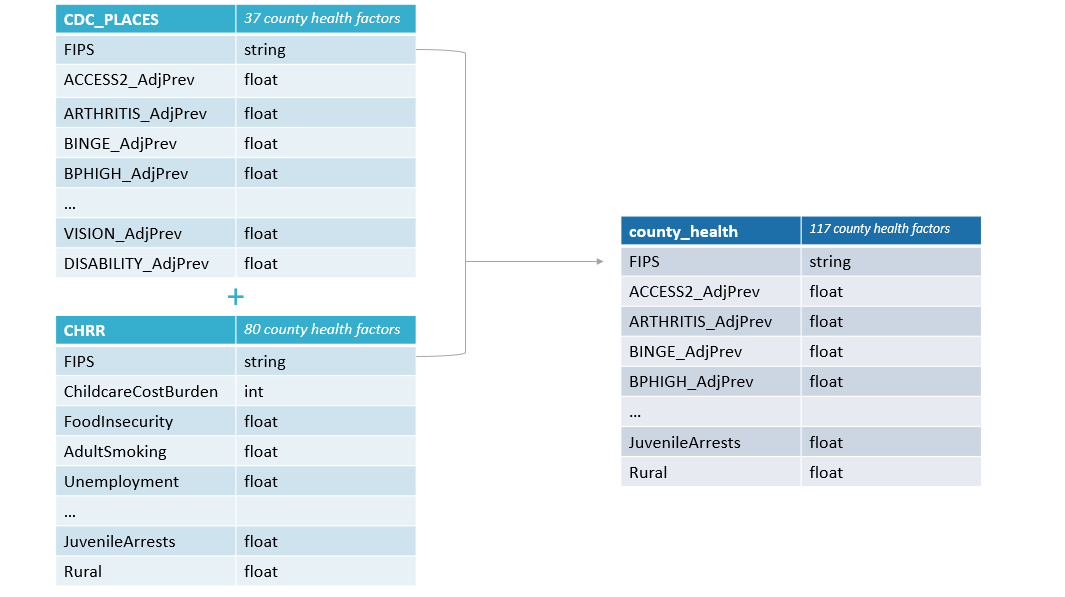

CDC PLACES and County Health Rankings & Roadmaps (CHRR) data will be combined to form the complete *county_health* table. They will be merged on FIPS code. FIPS codes are typically used to identify geographic areas, such as states, counties, and metropolitan areas, for administrative and statistical purposes. These codes are assigned by the federal government and are standardized across all government agencies.

In [11]:
# Merging CDC_PLACES and CHRR data

county_health = CDC_PLACES.merge(CHRR,on=['FIPS','STATE_ABBR'],how='left') 

In [12]:
display(county_health.STATE_ABBR.unique())
len(county_health.STATE_ABBR.unique())

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'ID',
       'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND',
       'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT',
       'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

49

In [13]:
# make a csv for county_health data
county_health.to_csv('county_health.csv', index=False)  

-----------------------------------------------------------------------------------------------------------------------------

## <font color=darkblue> Air Quality Data - USA </font>



### PM2.5 Data 2021

This dataset provides tabular county-level means of  **2021 PM2.5 Concentration in ug/m3 LC** generated from all Air Quality Monitors in the contingous US recognized by the EPA. 


### Data Source

The data set is from EPA daily downloads (https://www.epa.gov/outdoor-air-quality-data/download-daily-data) which was averaged yearly by air quality monitering site. Secong, Interpolation > IDW (Inverse Distance Weighting) was run in arcGIS and finally calculated means on county level using Zonal Statistics/ zonal statistics as table also in arcGIS. 

Ciation: US Environmental Protection Agency. Air Quality System Data Mart [internet database] available via https://www.epa.gov/outdoor-air-quality-data.

### Reading in 2021 Air Quality (PM2.5) Data - USA

In [14]:
county_airquality = pd.read_csv('county_airquality.csv', dtype={'FIPS': str})
pd.set_option("max_columns", None)
pd.set_option("max_rows", None)
county_airquality.head(3)

,FIPS,COUNTY_NAME,STATE_NAME,STATE_ABBR,AIRQUALTY_MEAN
0,06105,Trinity County,California,CA,17.756841
1,06063,Plumas County,California,CA,17.029498
2,41035,Klamath County,Oregon,OR,15.565063


In [15]:
county_airquality.dtypes

FIPS               object
COUNTY_NAME        object
STATE_NAME         object
STATE_ABBR         object
AIRQUALTY_MEAN    float64
dtype: object

In [16]:
display(county_airquality['STATE_ABBR'].unique())
len(county_airquality['STATE_ABBR'].unique())

array(['CA', 'OR', 'NV', 'KS', 'MN', 'OK', 'IN', 'MT', 'GA', 'TX', 'WA',
       'ID', 'MO', 'ND', 'MI', 'OH', 'IL', 'NE', 'KY', 'PA', 'WV', 'LA',
       'AR', 'IA', 'TN', 'AL', 'WI', 'UT', 'MS', 'SC', 'NJ', 'CO', 'SD',
       'FL', 'NC', 'VA', 'AZ', 'MD', 'DC', 'NM', 'NY', 'CT', 'WY', 'DE',
       'MA', 'RI', 'NH', 'VT', 'ME'], dtype=object)

49

##  Merging County Health (CDC_PLACES + CHRR) and Air Quality data

`county_health` and `county_airquality` data will be merged on FIPS code. FIPS codes are typically used to identify geographic areas, such as states, counties, and metropolitan areas, for administrative and statistical purposes. These codes are assigned by the federal government and are standardized across all government agencies.

In [17]:
#merging county_health and county_airquality data

fipsmerge = county_health.merge(county_airquality,on=['FIPS','STATE_ABBR','STATE_NAME','COUNTY_NAME'],how='left') 

In [18]:
display(fipsmerge['STATE_ABBR'].unique())
len(fipsmerge['STATE_ABBR'].unique())

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'ID',
       'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND',
       'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT',
       'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

49

In [19]:
fipsmerge.head()

,FIPS,STATE_NAME,COUNTY,STATE_ABBR,ACCESS2_AdjPrev,ARTHRITIS_AdjPrev,BINGE_AdjPrev,BPHIGH_AdjPrev,BPMED_AdjPrev,CANCER_AdjPrev,CASTHMA_AdjPrev,CERVICAL_AdjPrev,CHD_AdjPrev,CHECKUP_AdjPrev,CHOLSCREEN_AdjPrev,COLON_SCREEN_AdjPrev,COPD_AdjPrev,COREM_AdjPrev,COREW_AdjPrev,CSMOKING_AdjPrev,DENTAL_AdjPrev,DEPRESSION_AdjPrev,DIABETES_AdjPrev,GHLTH_AdjPrev,HIGHCHOL_AdjPrev,KIDNEY_AdjPrev,LPA_AdjPrev,MAMMOUSE_AdjPrev,MHLTH_AdjPrev,OBESITY_AdjPrev,PHLTH_AdjPrev,SLEEP_AdjPrev,STROKE_AdjPrev,TEETHLOST_AdjPrev,HEARING_AdjPrev,VISION_AdjPrev,COGNITION_AdjPrev,MOBILITY_AdjPrev,SELFCARE_AdjPrev,INDEPLIVE_AdjPrev,DISABILITY_AdjPrev,COUNTY_NAME,SchoolSegregation,ChildcareCostBurden,Dentists,HighSchoolCompletion,SomeCollege,Unemployment,ChildrenInPoverty,IncomeInequality,ChildrenSingleParentHH,AirPollution_2019_23,DrinkingWaterViolations,DrivingAloneToWork,LongCommute,DisconnectedYouth,GenderPayGap,MedianHHIncome,ChildrenFreeReducedPriceLunch,ResidentialSegregation,Homeownership,SevereHousingCostBurden,BroadbandAccess,Population,AgeBelow18,Age65Older,Black,AmericanIndianAlaskaNative,Asian,NativeHawaiianOtherPacificIslander,Hispanic,White,NotProficientEnglish,Female,PrematureDeath,PoorFairHealth,PoorPhysicalHealthDays,PoorMentalHealthDays,LowBirthweight,AdultSmoking,AdultObesity,FoodEnvironmentIndex,PhysicalInactivity,AccesstoExerciseOpportunities,ExcessiveDrinking,AlcoholImpairedDrivingDeaths,STI,TeenBirths,Uninsured,PrimaryCarePhysicians,PreventableHospitalStays,MammographyScreening,FluVaccinations,SocialAssociations,InjuryDeaths,AirPollution_2019,HHighHousingCosts,HHwOvercrowding,HHwLackKitchenPlumbingFacilities,LifeExpectancy,PrematureAgeAdjustedMortality,ChildMortality,InfantMortality,FrequentPhysicalDistress,DiabetesPrevalence,HIVPrevalence,FoodInsecurity,DrugOverdoseDeaths,UninsuredAdults,UninsuredChildren,HighSchoolGraduation,ChildrenEligibleFreeReducedLunch,Residential,ChildCareCenters,Homicides,Suicides,FirearmFatalities,MotorVehicleCrashDeaths,JuvenileArrests,FormalJuvenileDelinquencyCases,InformalJuvenileDelinquencyCases,Rural,AIRQUALTY_MEAN
0,01001,Alabama,Autauga,AL,10.4,28.2,15.5,37.2,65.3,6.3,10.2,84.3,5.7,76.0,85.1,71.5,6.8,44.0,41.3,16.9,62.9,22.7,10.7,17.3,32.1,2.9,29.1,74.8,18.0,38.9,11.7,37.5,3.0,12.7,6.0,4.7,14.3,14.7,3.7,8.2,30.2,Autauga County,0.055262,0.175268,0.000322,0.895845,0.596126,0.028169,0.161,4.794400,0.267662,10.0,0.0,0.864011,0.416,NaN,0.684511,66444,0.412507,32.707131,0.742451,0.127533,0.854639,59095,0.234064,0.160487,0.207310,0.004586,0.012031,0.001185,0.033268,0.724545,0.002312,0.513783,9407.948438,0.173,3.910265,5.703204,0.098713,0.169,0.389,6.7,0.291,0.544920,0.152378,0.290909,577.0,20.908880,0.100186,0.000440,3915.0,0.40,0.37,12.691429,68.033478,10.0,0.132084,0.016002,0.015770,75.263497,472.283923,58.562128,6.834686,0.117,0.107,218.0,0.133,9.350765,0.124074,0.040412,0.870000,0.279986,29.382404,5.726341,6.616163,17.457479,17.362711,18.067215,4.838710,24.0,6.0,0.406768,8.535348
1,01003,Alabama,Baldwin,AL,9.5,26.4,17.8,32.7,62.8,6.3,9.9,85.3,5.5,72.6,85.2,71.5,6.5,55.8,40.8,15.0,65.5,23.2,9.8,15.2,31.9,2.7,27.6,75.4,17.3,37.2,11.0,35.1,2.7,9.9,6.0,4.0,13.3,13.2,3.1,7.2,29.1,Baldwin County,0.090175,0.171167,0.000476,0.910142,0.661050,0.029630,0.164,4.300710,0.186992,7.6,1.0,0.814019,0.376,0.078527,0.740877,65658,0.463740,38.482766,0.771212,0.109629,0.878564,239294,0.212183,0.214698,0.083679,0.008003,0.011225,0.000685,0.048417,0.831488,0.007597,0.513477,8981.575353,0.152,3.730943,5.373666,0.081243,0.150,0.372,7.5,0.276,0.631293,0.164226,0.361446,317.6,20.202237,0.109971,0.000627,2799.0,0.44,0.42,9.653397,77.507985,7.6,0.105648,0.015230,0.006366,76.738314,416.218912,54.035005,5.329250,0.110,0.098,174.3,0.118,25.729422,0.133762,0.049369,0.886517,0.369956,39.543961,6.231824,3.388203,18.790126,14.343432,15.833332,20.305677,343.0,122.0,0.375865,8.263533
2,01005,Alabama,Barbour,AL,17.2,30.6,13.4,44.3,68.4,5.9,11.4,81.8,7.5,76.6,82.2,69.0,9.7,36.9,33.2,25.0,47.6,22.6,15.6,27.3,33.5,3.7,40.2,72.5,20.5,43.4,15.8,43.9,4

In [20]:
# make a csv for fipsmerge data
fipsmerge.to_csv('fipsmerge.csv', index=False)   

### Reading in geodata_shp (geospatial shapefile) data - USA

In [21]:
geodata_shp = gpd.read_file('geodata.shp')
geodata_shp = geodata_shp.drop(['NAME'],axis=1)
geodata_shp.head(3)

,FIPS,STATE_NAME,STATE_ABBR,geometry
0,01001,Alabama,AL,"POLYGON ((-86.82067 32.34731, -86.81446 32.37041, -86.84571 32.41035, -86.83142 32.43144, -86.86392 32.45088, -86.86462 32.46275, -86.88191 32.48229, -86.88184 32.50097, -86.90671 32.53891, -86.90197 32.58392, -86.91238 32.66572, -86.71134 32.66460, -..."
1,01003,Alabama,AL,"POLYGON ((-87.97309 31.16482, -87.93710 31.17346, -87.94147 31.19635, -87.91533 31.19324, -87.87200 31.22002, -87.85132 31.21058, -87.84643 31.21416, -87.86255 31.23723, -87.85016 31.24116, -87.83266 31.23359, -87.83490 31.25509, -87.85180 31.26585, -..."
2,01005,Alabama,AL,"POLYGON ((-85.74337 31.62624, -85.71720 31.67924, -85.70074 31.74305, -85.66543 31.78294, -85.67249 31.83841, -85.66342 31.88146, -85.58121 32.00641, -85.51161 32.00351, -85.51056 32.02447, -85.47068 32.02167, -85.47078 32.03035, -85.45719 32.03169, -..."


In [22]:
display(geodata_shp.STATE_ABBR.unique())
len(geodata_shp.STATE_ABBR.unique())

array(['AL', 'AZ', 'AR', 'AK', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'ID', 'IL', 'IN', 'IA', 'HI', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

51

##  Merging fipsmerge (county_health + county_airquality) with geodata

In [23]:
#merging county_health and county_airquality data

fipsmerge_geo = fipsmerge.merge(geodata_shp,on=['FIPS','STATE_ABBR','STATE_NAME'],how='left') 

In [24]:
# make merged dataframe into geopandas dataframe

fipsmerge_geo = gpd.GeoDataFrame(fipsmerge_geo, geometry="geometry", crs="EPSG:4326")

In [25]:
fipsmerge_geo.head(1)

,FIPS,STATE_NAME,COUNTY,STATE_ABBR,ACCESS2_AdjPrev,ARTHRITIS_AdjPrev,BINGE_AdjPrev,BPHIGH_AdjPrev,BPMED_AdjPrev,CANCER_AdjPrev,CASTHMA_AdjPrev,CERVICAL_AdjPrev,CHD_AdjPrev,CHECKUP_AdjPrev,CHOLSCREEN_AdjPrev,COLON_SCREEN_AdjPrev,COPD_AdjPrev,COREM_AdjPrev,COREW_AdjPrev,CSMOKING_AdjPrev,DENTAL_AdjPrev,DEPRESSION_AdjPrev,DIABETES_AdjPrev,GHLTH_AdjPrev,HIGHCHOL_AdjPrev,KIDNEY_AdjPrev,LPA_AdjPrev,MAMMOUSE_AdjPrev,MHLTH_AdjPrev,OBESITY_AdjPrev,PHLTH_AdjPrev,SLEEP_AdjPrev,STROKE_AdjPrev,TEETHLOST_AdjPrev,HEARING_AdjPrev,VISION_AdjPrev,COGNITION_AdjPrev,MOBILITY_AdjPrev,SELFCARE_AdjPrev,INDEPLIVE_AdjPrev,DISABILITY_AdjPrev,COUNTY_NAME,SchoolSegregation,ChildcareCostBurden,Dentists,HighSchoolCompletion,SomeCollege,Unemployment,ChildrenInPoverty,IncomeInequality,ChildrenSingleParentHH,AirPollution_2019_23,DrinkingWaterViolations,DrivingAloneToWork,LongCommute,DisconnectedYouth,GenderPayGap,MedianHHIncome,ChildrenFreeReducedPriceLunch,ResidentialSegregation,Homeownership,SevereHousingCostBurden,BroadbandAccess,Population,AgeBelow18,Age65Older,Black,AmericanIndianAlaskaNative,Asian,NativeHawaiianOtherPacificIslander,Hispanic,White,NotProficientEnglish,Female,PrematureDeath,PoorFairHealth,PoorPhysicalHealthDays,PoorMentalHealthDays,LowBirthweight,AdultSmoking,AdultObesity,FoodEnvironmentIndex,PhysicalInactivity,AccesstoExerciseOpportunities,ExcessiveDrinking,AlcoholImpairedDrivingDeaths,STI,TeenBirths,Uninsured,PrimaryCarePhysicians,PreventableHospitalStays,MammographyScreening,FluVaccinations,SocialAssociations,InjuryDeaths,AirPollution_2019,HHighHousingCosts,HHwOvercrowding,HHwLackKitchenPlumbingFacilities,LifeExpectancy,PrematureAgeAdjustedMortality,ChildMortality,InfantMortality,FrequentPhysicalDistress,DiabetesPrevalence,HIVPrevalence,FoodInsecurity,DrugOverdoseDeaths,UninsuredAdults,UninsuredChildren,HighSchoolGraduation,ChildrenEligibleFreeReducedLunch,Residential,ChildCareCenters,Homicides,Suicides,FirearmFatalities,MotorVehicleCrashDeaths,JuvenileArrests,FormalJuvenileDelinquencyCases,InformalJuvenileDelinquencyCases,Rural,AIRQUALTY_MEAN,geometry
0,01001,Alabama,Autauga,AL,10.4,28.2,15.5,37.2,65.3,6.3,10.2,84.3,5.7,76.0,85.1,71.5,6.8,44.0,41.3,16.9,62.9,22.7,10.7,17.3,32.1,2.9,29.1,74.8,18.0,38.9,11.7,37.5,3.0,12.7,6.0,4.7,14.3,14.7,3.7,8.2,30.2,Autauga County,0.055262,0.175268,0.000322,0.895845,0.596126,0.028169,0.161,4.7944,0.267662,10.0,0.0,0.864011,0.416,NaN,0.684511,66444,0.412507,32.707131,0.742451,0.127533,0.854639,59095,0.234064,0.160487,0.20731,0.004586,0.012031,0.001185,0.033268,0.724545,0.002312,0.513783,9407.948438,0.173,3.910265,5.703204,0.098713,0.169,0.389,6.7,0.291,0.54492,0.152378,0.290909,577.0,20.90888,0.100186,0.00044,3915.0,0.4,0.37,12.691429,68.033478,10.0,0.132084,0.016002,0.01577,75.263497,472.283923,58.562128,6.834686,0.117,0.107,218.0,0.133,9.350765,0.124074,0.040412,0.87,0.279986,29.382404,5.726341,6.616163,17.457479,17.362711,18.067215,4.83871,24.0,6.0,0.406768,8.535348,"POLYGON ((-86.82067 32.34731, -86.81446 32.37041, -86.84571 32.41035, -86.83142 32.43144, -86.86392 32.45088, -86.86462 32.46275, -86.88191 32.48229, -86.88184 32.50097, -86.90671 32.53891, -86.90197 32.58392, -86.91238 32.66572, -86.71134 32.66460, -..."


In [26]:
# save as shapefile (.shp)
fipsmerge_geo.to_file('fipsmerge_geo.shp', driver='ESRI Shapefile')